In [1]:
emb_dim = 150

In [2]:
train_pos=!ls aclImdb/train/pos
train_neg=!ls aclImdb/train/neg
test_pos=!ls aclImdb/test/pos
test_neg=!ls aclImdb/test/neg

In [3]:
train_data=[]
train_targets=[]
for i in range(0,len(train_pos)):
    with open ("aclImdb/train/pos/"+train_pos[i], "r") as myfile:
        train_data.append(myfile.readlines())
        train_targets.append(int(1))
for i in range(0,len(train_neg)):
    with open ("aclImdb/train/neg/"+train_neg[i], "r") as myfile:
        train_data.append(myfile.readlines())
        train_targets.append(int(0))

In [4]:
test_data=[]
test_targets=[]
for i in range(0,len(test_pos)):
    with open ("aclImdb/test/pos/"+test_pos[i], "r") as myfile:
        test_data.append(myfile.readlines())
        test_targets.append(int(1))
for i in range(0,len(test_neg)):
    with open ("aclImdb/test/neg/"+test_neg[i], "r") as myfile:
        test_data.append(myfile.readlines())
        test_targets.append(int(0))

In [5]:
val_data=train_data[10000:12500] + train_data[22500:25000]
val_targets=train_targets[10000:12500] + train_targets[22500:25000]

train_data = train_data[0:10000] + train_data[12500:22500]
train_targets =  train_targets[0:10000] + train_targets[12500:22500]

In [6]:
x=train_data.copy()
y=test_data.copy()
z=val_data.copy()
train_data=[]
test_data=[]
val_data=[]

In [7]:
for i in range(0,len(x)):
    train_data.append(x[i][0])
for i in range(0,len(y)):
    test_data.append(y[i][0])
for i in range(0,len(z)):
    val_data.append(z[i][0])

In [8]:
!pip install spacy
!python -m spacy download en_core_web_sm


    Linking successful
    /Users/preetgandhi95/miniconda3/envs/nlpclass/lib/python3.6/site-packages/en_core_web_sm
    -->
    /Users/preetgandhi95/miniconda3/envs/nlpclass/lib/python3.6/site-packages/spacy/data/en_core_web_sm

    You can now load the model via spacy.load('en_core_web_sm')



In [9]:
stopwords={'\n','\t','ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 
           'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an',
           'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself',
           'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 
           'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 
           'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 
           'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all',
           'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 
           'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 
           'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has',
           'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few',
           'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it',
           'how', 'further', 'was', 'here', 'than'}

In [10]:
# Let's write the tokenization function 
# set a hyperparameter - vocab size of dataset
#Takes most frequent 10000 words from training set and makes it a vocabulary
#Other words are put as unknown token.
#One for unknown and one for padding and 9998 for most frequent words
#Spacy will be used for tokenisation

import spacy
import string

# Load English tokenizer, tagger, parser, NER and word vectors
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# lowercase and remove punctuation
def tokenize(sent):
    tokens = tokenizer(sent)
    u= [token.text.lower() for token in tokens if (token.text not in punctuations)]
    ty= [token for token in u if (token not in stopwords)]
    return ty


# Example
tokens = tokenize(u'Apple is looking at buying U.K. startup for $1 billion')
print (tokens)

['apple', 'looking', 'buying', 'u.k.', 'startup', '1', 'billion']


In [11]:
# Let's write the tokenization function 
# set a hyperparameter - vocab size of dataset
#Takes most frequent 10000 words from training set and makes it a vocabulary
#Other words are put as unknown token.
#One for unknown and one for padding and 9998 for most frequent words
#Spacy will be used for tokenisation

import spacy
import string

# Load English tokenizer, tagger, parser, NER and word vectors
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# lowercase and remove punctuation
def tokenize2(sent):
    tokens = tokenizer(sent)
    u= [token.text.lower() for token in tokens if (token.text not in punctuations)]
    temp= [token for token in u if (token not in stopwords)]

    t=[]
    for i in range(0,len(temp)-1):
        t.append(temp[i]+ ' '+temp[i+1])
    return t

# Example
tokens = tokenize2(u'Apple is looking at buying U.K. startup for $1 billion')
print (tokens)

['apple looking', 'looking buying', 'buying u.k.', 'u.k. startup', 'startup 1', '1 billion']


In [12]:
# Let's write the tokenization function 
# set a hyperparameter - vocab size of dataset
#Takes most frequent 10000 words from training set and makes it a vocabulary
#Other words are put as unknown token.
#One for unknown and one for padding and 9998 for most frequent words
#Spacy will be used for tokenisation

import spacy
import string

# Load English tokenizer, tagger, parser, NER and word vectors
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# lowercase and remove punctuation
def tokenize3(sent):
    tokens = tokenizer(sent)
    u= [token.text.lower() for token in tokens if (token.text not in punctuations)]
    temp= [token for token in u if (token not in stopwords)]

    t=[]
    for i in range(0,len(temp)-2):
        t.append(temp[i]+ ' '+temp[i+1]+' '+temp[i+2])
    return t

# Example
tokens = tokenize3(u'Apple is looking at buying U.K. startup for $1 billion')
print (tokens)

['apple looking buying', 'looking buying u.k.', 'buying u.k. startup', 'u.k. startup 1', 'startup 1 billion']


In [13]:
# Let's write the tokenization function 
# set a hyperparameter - vocab size of dataset
#Takes most frequent 10000 words from training set and makes it a vocabulary
#Other words are put as unknown token.
#One for unknown and one for padding and 9998 for most frequent words
#Spacy will be used for tokenisation

import spacy
import string

# Load English tokenizer, tagger, parser, NER and word vectors
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# lowercase and remove punctuation
def tokenize4(sent):
    tokens = tokenizer(sent)
    u= [token.text.lower() for token in tokens if (token.text not in punctuations)]
    temp= [token for token in u if (token not in stopwords)]

    t=[]
    for i in range(0,len(temp)-3):
        t.append(temp[i]+ ' '+temp[i+1]+' '+temp[i+2]+' '+temp[i+3])
    return t

# Example
tokens = tokenize4(u'Apple is looking at buying U.K. startup for $1 billion')
print (tokens)

['apple looking buying u.k.', 'looking buying u.k. startup', 'buying u.k. startup 1', 'u.k. startup 1 billion']


In [14]:
# This is the code cell that tokenizes train/val/test datasets
# However it takes about 15-20 minutes to run it
# For convinience we have provided the preprocessed datasets
# Please see the next code cell

#Function to tokenize food dataset. 
#Goes through every doc in dataset and converts to tokens.  Takes 15-20 minutes
#Split documents in parallel and then tokenize.

import pickle as pkl

def tokenize_dataset(dataset):
    token_dataset = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens = []
    token_dataset2 = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens2 = []    
    token_dataset3 = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens3 = []    
    token_dataset4 = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens4 = []
    for sample in dataset:
        tokens = tokenize(sample)
        tokens2 = tokenize2(sample)
        tokens3 = tokenize3(sample)
        tokens4 = tokenize4(sample)
        token_dataset.append(tokens)
        all_tokens += tokens
        token_dataset2.append(tokens2)
        all_tokens2 += tokens2
        token_dataset3.append(tokens3)
        all_tokens3 += tokens3
        token_dataset4.append(tokens4)
        all_tokens4 += tokens4
    return token_dataset, all_tokens,token_dataset2, all_tokens2,token_dataset3, all_tokens3,token_dataset4, all_tokens4

# val set tokens
#print ("Tokenizing val data")
#val_data_tokens, _ = tokenize_dataset(val_data)
#pkl.dump(val_data_tokens, open("val_data_tokens.p", "wb"))

# test set tokens
#print ("Tokenizing test data")
#test_data_tokens, _ = tokenize_dataset(test_data)
#pkl.dump(test_data_tokens, open("test_data_tokens.p", "wb"))

# train set tokens
#print ("Tokenizing train data")
#train_data_tokens, all_train_tokens = tokenize_dataset(train_data)
#pkl.dump(train_data_tokens, open("train_data_tokens.p", "wb"))
#pkl.dump(all_train_tokens, open("all_train_tokens.p", "wb"))

In [15]:
#For bi-grams
import pickle as pkl
# FOR TEST
test_uni_tokens = pkl.load(open("nntest_uni_tokens.p", "rb"))
test_bi_tokens = pkl.load(open("nntest_bi_tokens.p", "rb"))
#FOR VAL
val_uni_tokens = pkl.load(open("nnval_uni_tokens.p", "rb"))
val_bi_tokens = pkl.load(open("nnval_bi_tokens.p", "rb"))
#FOR TRAIN
train_uni_tokens = pkl.load(open("nntrain_uni_tokens.p", "rb"))
train_bi_tokens = pkl.load(open("nntrain_bi_tokens.p", "rb"))
#ALL TOKENS
all_train_uni = pkl.load(open("nntrain_uni_alltokens.p", "rb"))
all_train_bi = pkl.load(open("nntrain_bi_alltokens.p", "rb"))
#COMBINING
val_data_tokens = []
test_data_tokens = []
train_data_tokens = []
all_train_tokens = all_train_uni + all_train_bi
for i in range(0,len(test_uni_tokens)):
    test_data_tokens.append(test_uni_tokens[i] + test_bi_tokens[i])
for i in range(0,len(train_uni_tokens)):
    train_data_tokens.append(train_uni_tokens[i] + train_bi_tokens[i])
for i in range(0,len(val_uni_tokens)):
    val_data_tokens.append(val_uni_tokens[i] + val_bi_tokens[i])


# double checking
print ("Train dataset size is {}".format(len(train_data_tokens)))
print ("Val dataset size is {}".format(len(val_data_tokens)))
print ("Test dataset size is {}".format(len(test_data_tokens)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens)))


Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Total number of tokens in train dataset is 5181552


Now, we are going to create the vocabulary of most common 10,000 tokens in the training set.

In [16]:
from collections import Counter

max_vocab_size = 100000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    token_counter = Counter(all_tokens)  # Count total unique tokens
    vocab, count = zip(*token_counter.most_common(max_vocab_size))  #Select top 10000 most occuring token
    id2token = list(vocab)   #List of most common 10000 token. Entry at certain index is token
    token2id = dict(zip(vocab, range(2,2+len(vocab))))    #Maps token to index
    id2token = ['<pad>', '<unk>'] + id2token  #Pad and unknown added
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens)

In [17]:
# Lets check the dictionary by loading random token from it
import random
random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

Token id 23594 ; token mating
Token mating; token id 23594


In [18]:
# convert token to id in the dataset
def token2index_dataset(tokens_data):  #REplaces each token with respective index
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_data_indices = token2index_dataset(train_data_tokens)
val_data_indices = token2index_dataset(val_data_tokens)
test_data_indices = token2index_dataset(test_data_tokens)

# double checking
print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Val dataset size is {}".format(len(val_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


Now we are going to create PyTorch DataLoader 

In [19]:
MAX_SENTENCE_LENGTH = 200
#MAX_SENTENCE_LENGTH is a hyperparameter
#We implement dataset first before data loader. It takes 2 things as input.
#Datatlist (dataset converted to indices of tokens)
#Targetlist ( number between 1-20 that represents the target of document)
#We need to implement len and getitem

import numpy as np
import torch
from torch.utils.data import Dataset

class NewsGroupDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of newsgroup tokens 
        @param target_list: list of newsgroup targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]
#Collate function adds padding symbols to data in case its smaller than
# the max sentence length
def newsgroup_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

# create pytorch dataloader
#train_loader = NewsGroupDataset(train_data_indices, train_targets)
#val_loader = NewsGroupDataset(val_data_indices, val_targets)
#test_loader = NewsGroupDataset(test_data_indices, test_targets)
#train_dataset is a hyperparameter and also batchsize
#train and validation also has shuffling here
BATCH_SIZE = 32
train_dataset = NewsGroupDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

#for i, (data, lengths, labels) in enumerate(train_loader):
#    print (data)
#    print (labels)
#    break

Here we will define Bag-of-Words model in PyTorch

In [20]:
# First import torch related libraries
#Bag of words takes token in each sentence in the model and embeds it in the continuous vector spce
#Embedding is a simple table lookup. 10000 X embedding size matrix
# We access vector for that index
#We average those vectors and continuous representations together and pass to linear
#function.



import torch
import torch.nn as nn
import torch.nn.functional as F

class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding. Use atleast 100 200 300 400 etc
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,20)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
            Takes input. Embeds it. And then averages it. The length is used for
            konwing actual length of sentence is padding is always used.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out

model = BagOfWords(len(id2token), emb_dim)

In [21]:
learning_rate = 0.01
num_epochs = 3 # number epoch to train
pl=[]
pa=[]
epl=[]
epa=[]
# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    #Forward propogates through the model.takes softmax to compute probabilities.
    #Takes index corresponding to most likely label.
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        #counts how many are correct
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for epoch in range(num_epochs):
    l=0
    a=0
    c=0
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            c=c+1
            l=l+loss.item()
            a=a+val_acc
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))

            pa.append(val_acc)
            pl.append(loss.item())
    epl.append(l/c)
    epa.append(a/c)

Epoch: [1/3], Step: [101/625], Validation Acc: 81.08
Epoch: [1/3], Step: [201/625], Validation Acc: 83.78
Epoch: [1/3], Step: [301/625], Validation Acc: 86.24
Epoch: [1/3], Step: [401/625], Validation Acc: 86.68
Epoch: [1/3], Step: [501/625], Validation Acc: 85.5
Epoch: [1/3], Step: [601/625], Validation Acc: 86.56
Epoch: [2/3], Step: [101/625], Validation Acc: 85.58
Epoch: [2/3], Step: [201/625], Validation Acc: 85.68
Epoch: [2/3], Step: [301/625], Validation Acc: 83.34
Epoch: [2/3], Step: [401/625], Validation Acc: 80.84
Epoch: [2/3], Step: [501/625], Validation Acc: 84.58
Epoch: [2/3], Step: [601/625], Validation Acc: 80.8
Epoch: [3/3], Step: [101/625], Validation Acc: 84.2
Epoch: [3/3], Step: [201/625], Validation Acc: 83.88
Epoch: [3/3], Step: [301/625], Validation Acc: 84.46
Epoch: [3/3], Step: [401/625], Validation Acc: 83.6
Epoch: [3/3], Step: [501/625], Validation Acc: 83.78
Epoch: [3/3], Step: [601/625], Validation Acc: 83.42


In [22]:
pa1=pa
pl1=pl
epa1=epa
epl1=epl

In [23]:
learning_rate = 0.1
num_epochs = 3 # number epoch to train
pl=[]
pa=[]
epl=[]
epa=[]
# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    #Forward propogates through the model.takes softmax to compute probabilities.
    #Takes index corresponding to most likely label.
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        #counts how many are correct
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for epoch in range(num_epochs):
    l=0
    a=0
    c=0
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            c=c+1
            l=l+loss.item()
            a=a+val_acc
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))

            pa.append(val_acc)
            pl.append(loss.item())
    epl.append(l/c)
    epa.append(a/c)
pa2=pa
pl2=pl
epa2=epa
epl2=epl

Epoch: [1/3], Step: [101/625], Validation Acc: 77.62
Epoch: [1/3], Step: [201/625], Validation Acc: 80.94
Epoch: [1/3], Step: [301/625], Validation Acc: 80.46
Epoch: [1/3], Step: [401/625], Validation Acc: 79.8
Epoch: [1/3], Step: [501/625], Validation Acc: 80.2
Epoch: [1/3], Step: [601/625], Validation Acc: 81.18
Epoch: [2/3], Step: [101/625], Validation Acc: 77.98
Epoch: [2/3], Step: [201/625], Validation Acc: 80.94
Epoch: [2/3], Step: [301/625], Validation Acc: 79.48
Epoch: [2/3], Step: [401/625], Validation Acc: 80.98
Epoch: [2/3], Step: [501/625], Validation Acc: 80.48
Epoch: [2/3], Step: [601/625], Validation Acc: 79.04
Epoch: [3/3], Step: [101/625], Validation Acc: 80.04
Epoch: [3/3], Step: [201/625], Validation Acc: 78.84
Epoch: [3/3], Step: [301/625], Validation Acc: 79.94
Epoch: [3/3], Step: [401/625], Validation Acc: 79.28
Epoch: [3/3], Step: [501/625], Validation Acc: 75.72
Epoch: [3/3], Step: [601/625], Validation Acc: 79.96


In [24]:
learning_rate = 0.001
num_epochs = 3 # number epoch to train
pl=[]
pa=[]
epl=[]
epa=[]
# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    #Forward propogates through the model.takes softmax to compute probabilities.
    #Takes index corresponding to most likely label.
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        #counts how many are correct
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for epoch in range(num_epochs):
    l=0
    a=0
    c=0
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            c=c+1
            l=l+loss.item()
            a=a+val_acc
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))

            pa.append(val_acc)
            pl.append(loss.item())
    epl.append(l/c)
    epa.append(a/c)
pa3=pa
pl3=pl
epa3=epa
epl3=epl

Epoch: [1/3], Step: [101/625], Validation Acc: 80.38
Epoch: [1/3], Step: [201/625], Validation Acc: 80.28
Epoch: [1/3], Step: [301/625], Validation Acc: 80.44
Epoch: [1/3], Step: [401/625], Validation Acc: 80.46
Epoch: [1/3], Step: [501/625], Validation Acc: 80.48
Epoch: [1/3], Step: [601/625], Validation Acc: 80.38
Epoch: [2/3], Step: [101/625], Validation Acc: 80.46
Epoch: [2/3], Step: [201/625], Validation Acc: 80.24
Epoch: [2/3], Step: [301/625], Validation Acc: 80.46
Epoch: [2/3], Step: [401/625], Validation Acc: 80.44
Epoch: [2/3], Step: [501/625], Validation Acc: 80.72
Epoch: [2/3], Step: [601/625], Validation Acc: 80.78
Epoch: [3/3], Step: [101/625], Validation Acc: 80.62
Epoch: [3/3], Step: [201/625], Validation Acc: 80.6
Epoch: [3/3], Step: [301/625], Validation Acc: 80.8
Epoch: [3/3], Step: [401/625], Validation Acc: 80.26
Epoch: [3/3], Step: [501/625], Validation Acc: 80.64
Epoch: [3/3], Step: [601/625], Validation Acc: 80.38


In [25]:
learning_rate = 1
num_epochs = 3 # number epoch to train
pl=[]
pa=[]
epl=[]
epa=[]
# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    #Forward propogates through the model.takes softmax to compute probabilities.
    #Takes index corresponding to most likely label.
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        #counts how many are correct
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for epoch in range(num_epochs):
    l=0
    a=0
    c=0
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            c=c+1
            l=l+loss.item()
            a=a+val_acc
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))

            pa.append(val_acc)
            pl.append(loss.item())
    epl.append(l/c)
    epa.append(a/c)
pa4=pa
pl4=pl
epa4=epa
epl4=epl

Epoch: [1/3], Step: [101/625], Validation Acc: 75.78
Epoch: [1/3], Step: [201/625], Validation Acc: 79.18
Epoch: [1/3], Step: [301/625], Validation Acc: 68.98
Epoch: [1/3], Step: [401/625], Validation Acc: 75.5
Epoch: [1/3], Step: [501/625], Validation Acc: 79.12
Epoch: [1/3], Step: [601/625], Validation Acc: 78.76
Epoch: [2/3], Step: [101/625], Validation Acc: 80.92
Epoch: [2/3], Step: [201/625], Validation Acc: 81.72
Epoch: [2/3], Step: [301/625], Validation Acc: 77.64
Epoch: [2/3], Step: [401/625], Validation Acc: 78.38
Epoch: [2/3], Step: [501/625], Validation Acc: 81.46
Epoch: [2/3], Step: [601/625], Validation Acc: 81.22
Epoch: [3/3], Step: [101/625], Validation Acc: 83.0
Epoch: [3/3], Step: [201/625], Validation Acc: 76.16
Epoch: [3/3], Step: [301/625], Validation Acc: 79.18
Epoch: [3/3], Step: [401/625], Validation Acc: 82.28
Epoch: [3/3], Step: [501/625], Validation Acc: 78.98
Epoch: [3/3], Step: [601/625], Validation Acc: 80.74


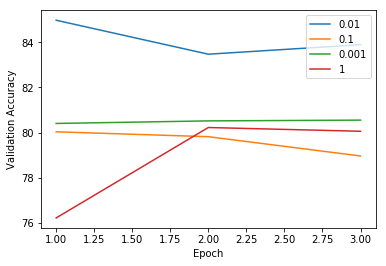

In [26]:
xx=[1,2,3]
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xx,epa1,label='0.01')
plt.plot(xx,epa2,label='0.1')
plt.plot(xx,epa3,label='0.001')
plt.plot(xx,epa4,label='1')
plt.legend(loc=1)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.show()

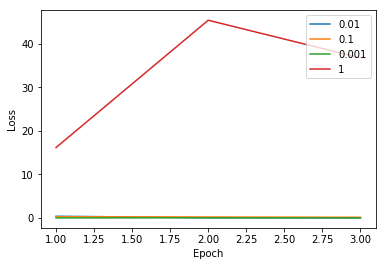

In [27]:
xx=[1,2,3]
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xx,epl1,label='0.01')
plt.plot(xx,epl2,label='0.1')
plt.plot(xx,epl3,label='0.001')
plt.plot(xx,epl4,label='1')
plt.legend(loc=1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()